In [10]:
# 🔌 Cargar la extensión de Kedro en Jupyter
%load_ext kedro.ipython
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [2]:

# Cargar datasets intermedios (ESTOS YA TIENEN VARIABLES QUE CONSIDERAMOS IRRELEVANTES " UNNAMED / VAR REDUNDATE)
df_cleaned = catalog.load("NIV_cleaned_dataset")
df_customer = catalog.load("NIV_customer_agg")
df_rfm = catalog.load("NIV_RFM")


print("Cleaned:", df_cleaned.shape)
print("Customer:", df_customer.shape)
print("RFM:", df_rfm.shape)

[09/15/25 17:53:38] INFO     Loading data from NIV_cleaned_dataset (CSVDataset)...             ]8;id=48123;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=151323;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[09/15/25 17:53:40] INFO     Loading data from NIV_customer_agg (CSVDataset)...                ]8;id=550277;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=820708;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[09/15/25 17:53:42] INFO     Loading data from NIV_RFM (CSVDataset)...                         ]8;id=841730;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=26878;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Cleaned: (984247, 9)
Customer: (838370, 14)
RFM: (838370, 9)


In [3]:
#Eliminar nulos porque son despreciales (7 o 10)
print("Shape antes de eliminar nulos:", df_cleaned.shape)
print("Nulos restantes por columna:\n", df_cleaned.isnull().sum())
df_cleaned = df_cleaned.dropna()
print("Shape después de eliminar nulos:", df_cleaned.shape)
print("Nulos restantes por columna:\n", df_cleaned.isnull().sum())


print("Shape antes de eliminar nulos:", df_customer.shape)
print("Nulos restantes por columna:\n", df_customer.isnull().sum())
df_customer = df_customer.dropna()
print("Shape después de eliminar nulos:", df_customer.shape)
print("Nulos restantes por columna:\n", df_customer.isnull().sum())



Shape antes de eliminar nulos: (984247, 9)
Nulos restantes por columna:
 TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               7
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64
Shape después de eliminar nulos: (984240, 9)
Nulos restantes por columna:
 TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64
Shape antes de eliminar nulos: (838370, 14)
Nulos restantes por columna:
 CustomerID               0
txn_count                0
total_spent              0
avg_spent                0
max_spent                0
avg_balance              0
first_txn_date           0
last_txn_date            0
location      

In [4]:
# 2️⃣ Merge maestro a nivel transacción
df_full = (
    df_cleaned
    .merge(df_customer, on="CustomerID", how="left")
    .merge(df_rfm, on="CustomerID", how="left")
)

print("✅ Merge completo")
print("Shape final:", df_full.shape)
print("Columnas:", df_full.columns.tolist()[:15], "...")  # solo primeras 15 para que no se vea gigante

# Después de hacer tu merge
catalog.save("NIV_full", df_full)

# Verificar
df_test = catalog.load("NIV_full")
print(df_test.shape)
df_test.head()

✅ Merge completo
Shape final: (984240, 30)
Columnas: ['TransactionID', 'CustomerID', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'Age', 'txn_count', 'total_spent', 'avg_spent', 'max_spent', 'avg_balance', 'first_txn_date'] ...


[09/15/25 17:53:54] INFO     Saving data to NIV_full (CSVDataset)...                           ]8;id=51888;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=763178;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

[09/15/25 17:54:10] INFO     Loading data from NIV_full (CSVDataset)...                        ]8;id=12066;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=199101;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

(984240, 30)


,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,txn_count,...,txn_per_day,avg_spent_pct_balance,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment_Final
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,22,1.0,...,1.000000,0.001403,80,1,25.0,1,3,1,131,At Risk/ Lost
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,59,1.0,...,1.000000,12.330613,80,1,27999.0,1,1,5,115,At Risk/ Lost
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,19,1.0,...,1.000000,0.025679,80,1,459.0,1,2,3,123,At Risk/ Lost
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0,43,2.0,...,0.181818,0.003379,69,2,2938.4,2,5,5,255,Critical
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5,28,1.0,...,1.000000,0.262494,80,1,1762.5,1,5,4,154,Critical


In [5]:
# 🚀 Cargar desde el catálogo
df_full = catalog.load("NIV_full")

# 🔍 Información general
print("Shape:", df_full.shape)
print("\nColumnas y tipos:")
print(df_full.dtypes)



[09/15/25 17:54:14] INFO     Loading data from NIV_full (CSVDataset)...                        ]8;id=185106;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=956393;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Shape: (984240, 30)

Columnas y tipos:
TransactionID               object
CustomerID                  object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime             object
TransactionAmount (INR)    float64
Age                          int64
txn_count                  float64
total_spent                float64
avg_spent                  float64
max_spent                  float64
avg_balance                float64
first_txn_date              object
last_txn_date               object
location                    object
gender                      object
recency_days               float64
tenure_days                float64
txn_per_day                float64
avg_spent_pct_balance      float64
Recency                      int64
Frequency                    int64
Monetary                   float64
R                            int64
F                            int64
M               

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,txn_count,...,txn_per_day,avg_spent_pct_balance,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment_Final
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,22,1.0,...,1.000000,0.001403,80,1,25.0,1,3,1,131,At Risk/ Lost
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,59,1.0,...,1.000000,12.330613,80,1,27999.0,1,1,5,115,At Risk/ Lost
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,19,1.0,...,1.000000,0.025679,80,1,459.0,1,2,3,123,At Risk/ Lost
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0,43,2.0,...,0.181818,0.003379,69,2,2938.4,2,5,5,255,Critical
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5,28,1.0,...,1.000000,0.262494,80,1,1762.5,1,5,4,154,Critical


In [8]:
# 📌 Eliminar columnas irrelevantes en df_full
cols_drop = ["location", "gender", "first_txn_date", "last_txn_date", "Segment_Final"]

df_full_clean = df_full.drop(columns=cols_drop, errors="ignore")

print("✅ Columnas eliminadas:", cols_drop)
print("👉 Shape final:", df_full_clean.shape)
print("👉 Columnas actuales:", df_full_clean.columns.tolist())

# Después de hacer tu merge
catalog.save("NIV_full_clean", df_full)

# Verificar
df_test2 = catalog.load("NIV_full_clean")
print(df_test.shape)
df_test.head()

✅ Columnas eliminadas: ['location', 'gender', 'first_txn_date', 'last_txn_date', 'Segment_Final']
👉 Shape final: (984240, 25)
👉 Columnas actuales: ['TransactionID', 'CustomerID', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'Age', 'txn_count', 'total_spent', 'avg_spent', 'max_spent', 'avg_balance', 'recency_days', 'tenure_days', 'txn_per_day', 'avg_spent_pct_balance', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM Score']


[09/15/25 17:56:34] INFO     Saving data to NIV_full_clean (CSVDataset)...                     ]8;id=932398;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=917340;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

[09/15/25 17:56:50] INFO     Loading data from NIV_full_clean (CSVDataset)...                  ]8;id=211982;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=454535;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

(984240, 30)


,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,txn_count,...,txn_per_day,avg_spent_pct_balance,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment_Final
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,22,1.0,...,1.000000,0.001403,80,1,25.0,1,3,1,131,At Risk/ Lost
1,T2,C2142763,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,59,1.0,...,1.000000,12.330613,80,1,27999.0,1,1,5,115,At Risk/ Lost
2,T3,C4417068,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,19,1.0,...,1.000000,0.025679,80,1,459.0,1,2,3,123,At Risk/ Lost
3,T4,C5342380,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0,43,2.0,...,0.181818,0.003379,69,2,2938.4,2,5,5,255,Critical
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5,28,1.0,...,1.000000,0.262494,80,1,1762.5,1,5,4,154,Critical


In [13]:
print("\nColumnas y tipos:")
print(df_test2.dtypes)


Columnas y tipos:
TransactionID               object
CustomerID                  object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime             object
TransactionAmount (INR)    float64
Age                          int64
txn_count                  float64
total_spent                float64
avg_spent                  float64
max_spent                  float64
avg_balance                float64
first_txn_date              object
last_txn_date               object
location                    object
gender                      object
recency_days               float64
tenure_days                float64
txn_per_day                float64
avg_spent_pct_balance      float64
Recency                      int64
Frequency                    int64
Monetary                   float64
R                            int64
F                            int64
M                            int64
R

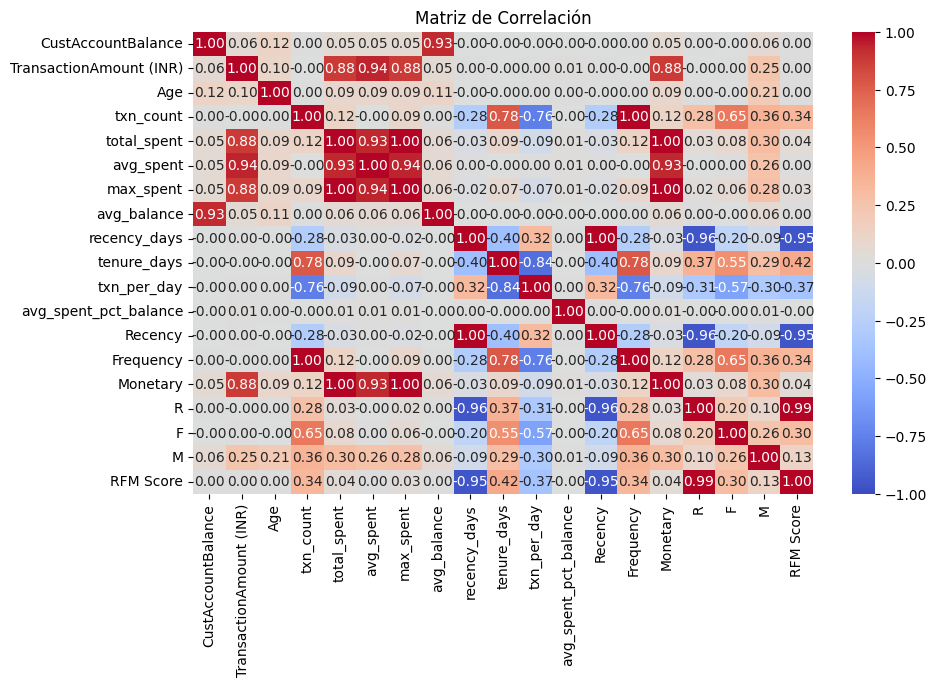

In [11]:
# df es tu DataFrame
plt.figure(figsize=(10,6))
sns.heatmap(df_test2.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()